In [1]:
import sys
sys.path.append('../')
import os
from codes.model.resnetv2 import build_InceptionResNetV2_pretrain
from codes.data.load_data import load_files

import numpy as np


In [2]:
#Prepare dataset
files = "C:\\dataset\BreaKHis_v1\\histology_slides\\breast"
experiment = "C:\\"
volumn = 7909
ratio = 0.7
list_dataset = load_files(src_folder=files,split=ratio, filenamepattern="*.png",dataset_volume = volumn,flag=1) 
train = list_dataset[0]
test = list_dataset[1]
val = list_dataset[2]

In [4]:
#resnetv3
resnet = build_InceptionResNetV2_pretrain(img_shape=(299,299,3),num_classes=1)
batch_size = 8
total_batch = (volumn * 0.7)//batch_size
train = train.shuffle(int(volumn * ratio))
train = train.batch(batch_size)
val = val.batch(batch_size)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_v1[0][0]     
______________________________________________________________________________________________

activation_98 (Activation)      (None, 17, 17, 160)  0           batch_normalization_v1_98[0][0]  
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 17, 17, 192)  208896      block17_5_ac[0][0]               
__________________________________________________________________________________________________
conv2d_99 (Conv2D)              (None, 17, 17, 192)  215040      activation_98[0][0]              
__________________________________________________________________________________________________
batch_normalization_v1_96 (Batc (None, 17, 17, 192)  576         conv2d_96[0][0]                  
__________________________________________________________________________________________________
batch_normalization_v1_99 (Batc (None, 17, 17, 192)  576         conv2d_99[0][0]                  
__________________________________________________________________________________________________
activation

                                                                 activation_190[0][0]             
__________________________________________________________________________________________________
block8_7_conv (Conv2D)          (None, 8, 8, 2080)   933920      block8_7_mixed[0][0]             
__________________________________________________________________________________________________
block8_7 (Lambda)               (None, 8, 8, 2080)   0           block8_6_ac[0][0]                
                                                                 block8_7_conv[0][0]              
__________________________________________________________________________________________________
block8_7_ac (Activation)        (None, 8, 8, 2080)   0           block8_7[0][0]                   
__________________________________________________________________________________________________
conv2d_192 (Conv2D)             (None, 8, 8, 192)    399360      block8_7_ac[0][0]                
__________

In [5]:
from codes.data.utils import train_model 
epoches = 5
total_batch = (volumn * ratio)//batch_size
train_losses,val_losses = train_model(model=resnet
                                ,dataset_train=train, dataset_val=val
                                , epochs = epoches
                                , print_interval=20 
                                , total_batch=total_batch
                                , train_vol=int(volumn * ratio)
                                , filename="C:\\resnet_299x2999.h5")

[Epoch 0/5] [Batch 0/692] [T loss: 13.433998, acc:  12%] time: 0:06:50.825894
[Epoch 0/5] [Batch 20/692] [T loss: 15.337335, acc:   0%] time: 0:09:59.217418
[Epoch 0/5] [Batch 40/692] [T loss: 7.667181, acc:  50%] time: 0:13:10.654354
[Epoch 0/5] [Batch 60/692] [T loss: 15.333278, acc:   0%] time: 0:16:22.648458
[Epoch 0/5] [Batch 80/692] [T loss: 11.499933, acc:  25%] time: 0:19:34.851439
[Epoch 0/5] [Batch 100/692] [T loss: 13.416585, acc:  12%] time: 0:22:47.350521
[Epoch 0/5] [Batch 120/692] [T loss: 13.416584, acc:  12%] time: 0:26:01.661966
[Epoch 0/5] [Batch 140/692] [T loss: 11.499929, acc:  25%] time: 0:29:15.466876
[Epoch 0/5] [Batch 160/692] [T loss: 7.666619, acc:  50%] time: 0:32:28.298048
[Epoch 0/5] [Batch 180/692] [T loss: 15.333239, acc:   0%] time: 0:35:41.522981
[Epoch 0/5] [Batch 200/692] [T loss: 9.583275, acc:  37%] time: 0:38:55.075554
[Epoch 0/5] [Batch 220/692] [T loss: 7.666619, acc:  50%] time: 0:42:07.378714
[Epoch 0/5] [Batch 240/692] [T loss: 9.583275, acc

[Epoch 2/5] [Batch 280/692] [T loss: 11.499929, acc:  25%] time: 4:44:01.248910
[Epoch 2/5] [Batch 300/692] [T loss: 11.499929, acc:  25%] time: 4:47:13.160321
[Epoch 2/5] [Batch 320/692] [T loss: 13.416584, acc:  12%] time: 4:50:25.512023
[Epoch 2/5] [Batch 340/692] [T loss: 11.499929, acc:  25%] time: 4:53:37.124554
[Epoch 2/5] [Batch 360/692] [T loss: 7.666619, acc:  50%] time: 4:56:50.053299
[Epoch 2/5] [Batch 380/692] [T loss: 11.499929, acc:  25%] time: 5:00:02.077589
[Epoch 2/5] [Batch 400/692] [T loss: 5.749965, acc:  62%] time: 5:03:14.080143
[Epoch 2/5] [Batch 420/692] [T loss: 5.749965, acc:  62%] time: 5:06:25.742456
[Epoch 2/5] [Batch 440/692] [T loss: 13.416584, acc:  12%] time: 5:09:37.061020
[Epoch 2/5] [Batch 460/692] [T loss: 13.416584, acc:  12%] time: 5:12:49.000328
[Epoch 2/5] [Batch 480/692] [T loss: 9.583274, acc:  37%] time: 5:16:00.443332
[Epoch 2/5] [Batch 500/692] [T loss: 11.499929, acc:  25%] time: 5:19:12.619840
[Epoch 2/5] [Batch 520/692] [T loss: 7.66661

[Epoch 4/5] [Batch 560/692] [T loss: 5.749965, acc:  62%] time: 9:21:08.010480
[Epoch 4/5] [Batch 580/692] [T loss: 9.583275, acc:  37%] time: 9:24:19.955109
[Epoch 4/5] [Batch 600/692] [T loss: 7.666619, acc:  50%] time: 9:27:30.145101
[Epoch 4/5] [Batch 620/692] [T loss: 9.583275, acc:  37%] time: 9:30:39.451711
[Epoch 4/5] [Batch 640/692] [T loss: 11.499929, acc:  25%] time: 9:33:49.172010
[Epoch 4/5] [Batch 660/692] [T loss: 11.499929, acc:  25%] time: 9:36:58.408663
[Epoch 4/5] [Batch 680/692] [T loss: 5.749965, acc:  62%] time: 9:40:09.600919
[Epoch 4/5] [Batch 0/692] [E loss: 13.416584, acc:  12%] time: 9:41:56.728952
[Epoch 4/5] [Batch 20/692] [E loss: 11.499929, acc:  25%] time: 9:42:18.121013
[Epoch 4/5] [Batch 40/692] [E loss: 7.666619, acc:  50%] time: 9:42:39.559469
[Epoch 4/5] [Batch 60/692] [E loss: 9.583275, acc:  37%] time: 9:43:01.231897
[Epoch 4/5] [Batch 80/692] [E loss: 7.666619, acc:  50%] time: 9:43:22.746875
[Epoch 4/5] [Batch 100/692] [E loss: 11.499929, acc:  

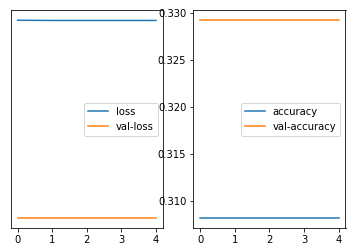

In [6]:
from codes.data.utils import plotting
plotting(train_losses,val_losses)

In [7]:
from codes.data.utils import predict_model_svm
predict_model_svm(resnet,test,"c:\\test_resnet_299x299.pkl")

------------------------Predict model-----------------------------
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicte

[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1

[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted labe

[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1

[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1

[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1

[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label:

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label:

[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted labe

[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted la

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted labe

In [3]:
#resnetv3
resnet = build_InceptionResNetV2_pretrain(img_shape=(299,299,3),num_classes=1)
batch_size = 8
total_batch = (volumn * 0.7)//batch_size
train = train.shuffle(int(volumn * ratio))
train = train.batch(batch_size)
val = val.batch(batch_size)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_v1[0][0]     
______________________________________________________________________________________________

block17_16 (Lambda)             (None, 17, 17, 1088) 0           block17_15_ac[0][0]              
                                                                 block17_16_conv[0][0]            
__________________________________________________________________________________________________
block17_16_ac (Activation)      (None, 17, 17, 1088) 0           block17_16[0][0]                 
__________________________________________________________________________________________________
conv2d_141 (Conv2D)             (None, 17, 17, 128)  139264      block17_16_ac[0][0]              
__________________________________________________________________________________________________
batch_normalization_v1_141 (Bat (None, 17, 17, 128)  384         conv2d_141[0][0]                 
__________________________________________________________________________________________________
activation_141 (Activation)     (None, 17, 17, 128)  0           batch_normalization_v1_141[0][0] 
__________

In [4]:
from codes.data.utils import train_model 
epoches = 5
total_batch = (volumn * ratio)//batch_size
train_losses,val_losses = train_model(model=resnet
                                ,dataset_train=train, dataset_val=val
                                , epochs = epoches
                                , print_interval=20 
                                , total_batch=total_batch
                                , train_vol=int(volumn * ratio)
                                , filename="C:\\resnet_299x2999_svm.h5")

[Epoch 0/5] [Batch 0/692] [T loss: 1.025196, acc:  37%] time: 0:07:00.371722
[Epoch 0/5] [Batch 20/692] [T loss: 0.609202, acc:  62%] time: 0:10:03.441073
[Epoch 0/5] [Batch 40/692] [T loss: 0.189682, acc:  87%] time: 0:13:08.195787
[Epoch 0/5] [Batch 60/692] [T loss: 0.219244, acc:  87%] time: 0:16:13.241702
[Epoch 0/5] [Batch 80/692] [T loss: 0.933882, acc:  62%] time: 0:19:19.490923
[Epoch 0/5] [Batch 100/692] [T loss: 0.925831, acc:  87%] time: 0:22:26.146959
[Epoch 0/5] [Batch 120/692] [T loss: 0.378548, acc:  75%] time: 0:25:34.194312
[Epoch 0/5] [Batch 140/692] [T loss: 0.521469, acc:  87%] time: 0:28:42.398698
[Epoch 0/5] [Batch 160/692] [T loss: 0.382132, acc:  87%] time: 0:31:51.648527
[Epoch 0/5] [Batch 180/692] [T loss: 0.422620, acc:  87%] time: 0:35:01.181898
[Epoch 0/5] [Batch 200/692] [T loss: 0.517904, acc:  62%] time: 0:38:11.057592
[Epoch 0/5] [Batch 220/692] [T loss: 0.105617, acc: 100%] time: 0:41:21.745561
[Epoch 0/5] [Batch 240/692] [T loss: 0.617243, acc:  75%] 

[Epoch 2/5] [Batch 300/692] [T loss: 0.240289, acc:  87%] time: 4:45:44.512871
[Epoch 2/5] [Batch 320/692] [T loss: 0.002385, acc: 100%] time: 4:48:50.545552
[Epoch 2/5] [Batch 340/692] [T loss: 0.081761, acc: 100%] time: 4:51:56.095608
[Epoch 2/5] [Batch 360/692] [T loss: 0.155162, acc: 100%] time: 4:55:02.692210
[Epoch 2/5] [Batch 380/692] [T loss: 0.309722, acc:  87%] time: 4:58:08.504929
[Epoch 2/5] [Batch 400/692] [T loss: 0.072721, acc:  87%] time: 5:01:13.819666
[Epoch 2/5] [Batch 420/692] [T loss: 0.530997, acc:  75%] time: 5:04:20.061687
[Epoch 2/5] [Batch 440/692] [T loss: 0.002515, acc: 100%] time: 5:07:25.745083
[Epoch 2/5] [Batch 460/692] [T loss: 0.192424, acc:  87%] time: 5:10:31.777870
[Epoch 2/5] [Batch 480/692] [T loss: 0.049508, acc: 100%] time: 5:13:39.781936
[Epoch 2/5] [Batch 500/692] [T loss: 0.074881, acc:  87%] time: 5:16:47.990853
[Epoch 2/5] [Batch 520/692] [T loss: 0.027124, acc: 100%] time: 5:19:52.802858
[Epoch 2/5] [Batch 540/692] [T loss: 0.090752, acc: 

[Epoch 4/5] [Batch 600/692] [T loss: 0.281416, acc:  87%] time: 9:23:42.367934
[Epoch 4/5] [Batch 620/692] [T loss: 0.336429, acc:  87%] time: 9:26:50.708882
[Epoch 4/5] [Batch 640/692] [T loss: 0.003046, acc: 100%] time: 9:29:58.195215
[Epoch 4/5] [Batch 660/692] [T loss: 0.003057, acc: 100%] time: 9:33:06.381621
[Epoch 4/5] [Batch 680/692] [T loss: 0.003101, acc: 100%] time: 9:36:14.411332
[Epoch 4/5] [Batch 0/692] [E loss: 0.003003, acc: 100%] time: 9:38:00.770320
[Epoch 4/5] [Batch 20/692] [E loss: 0.094313, acc: 100%] time: 9:38:39.880342
[Epoch 4/5] [Batch 40/692] [E loss: 0.330831, acc:  75%] time: 9:39:18.691972
[Epoch 4/5] [Batch 60/692] [E loss: 0.332015, acc:  87%] time: 9:39:57.988091
[Epoch 4/5] [Batch 80/692] [E loss: 0.337541, acc:  87%] time: 9:40:36.878879
[Epoch 4/5] [Batch 100/692] [E loss: 0.063035, acc: 100%] time: 9:41:16.301335
[Epoch 4/5] [Batch 120/692] [E loss: 0.220381, acc:  87%] time: 9:41:55.816430
[Epoch 4/5] [Batch 140/692] [E loss: 0.088666, acc: 100%] 

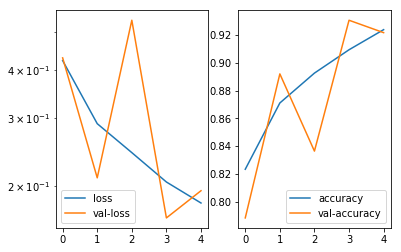

In [5]:
from codes.data.utils import plotting
plotting(train_losses,val_losses)

In [6]:
from codes.data.utils import predict_model_svm
predict_model_svm(resnet,test,"c:\\test_resnet_299x299_svm.pkl")

------------------------Predict model-----------------------------
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[Tru

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ]

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ]

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ]

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label:

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: